# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Check the number of unique Mouse IDs in the combined data
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs before cleaning: {number_of_mice}")


Number of unique Mouse IDs before cleaning: 249


In [11]:
# Identify duplicates in the data based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Print the duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print(f"Duplicate Mouse IDs: {duplicate_mouse_ids}")


Duplicate Mouse IDs: ['g989']


In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Identify duplicates
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice['Mouse ID'].unique())

# Get the unique Mouse IDs with duplicates

duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]
print(duplicate_mouse_data)




['g989']
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294            

In [13]:
# Remove the duplicates to create a cleaned DataFrame
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Verify the number of unique Mouse IDs in the cleaned data
number_of_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs after cleaning: {number_of_mice_cleaned}")


Number of unique Mouse IDs after cleaning: 249


In [14]:
# Optional: Get all the data for the duplicate mouse ID.
# Filter the combined_data DataFrame to get all records for Mouse ID 'g989'

duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']

# Display the data
duplicate_mouse_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])


In [16]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique Mouse IDs in the cleaned data: {number_of_mice_cleaned}")

Number of unique Mouse IDs in the cleaned data: 249


## Summary Statistics

In [18]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# First, group the cleaned data by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean tumor volume for each drug regimen
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()

# Calculate the median tumor volume for each drug regimen
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()

# Calculate the variance of the tumor volume for each drug regimen
tumor_volume_variance = grouped_data['Tumor Volume (mm3)'].var()

# Calculate the standard deviation of the tumor volume for each drug regimen
tumor_volume_std_dev = grouped_data['Tumor Volume (mm3)'].std()

# Calculate the standard error of the mean (SEM) of the tumor volume for each drug regimen
tumor_volume_sem = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': tumor_volume_variance,
    'Tumor Volume Std. Dev.': tumor_volume_std_dev,
    'Tumor Volume SEM': tumor_volume_sem
})

# Display the summary statistics DataFrame
print(summary_stats)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method to produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby('Drug Regimen').agg(
    Mean_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Median_Tumor_Volume=('Tumor Volume (mm3)', 'median'),
    Tumor_Volume_Variance=('Tumor Volume (mm3)', 'var'),
    Tumor_Volume_Std_Dev=('Tumor Volume (mm3)', 'std'),
    Tumor_Volume_SEM=('Tumor Volume (mm3)', 'sem')
)

# Display the advanced summary statistics DataFrame
print(summary_stats_advanced)



              Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor_Volume_Std_Dev  Tumor_Volume_SE

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

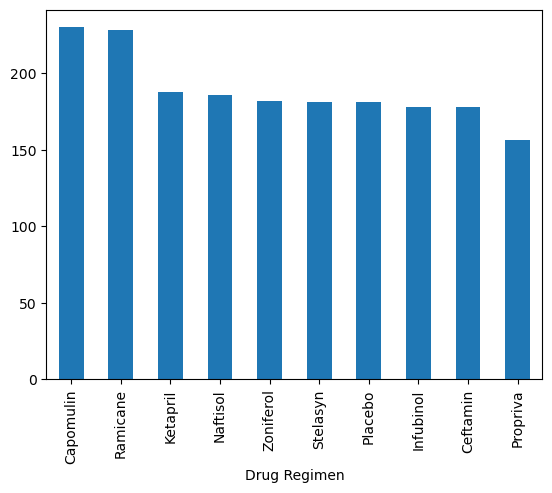

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cleaned_data['Drug Regimen'].value_counts().plot(kind='bar')


<BarContainer object of 10 artists>

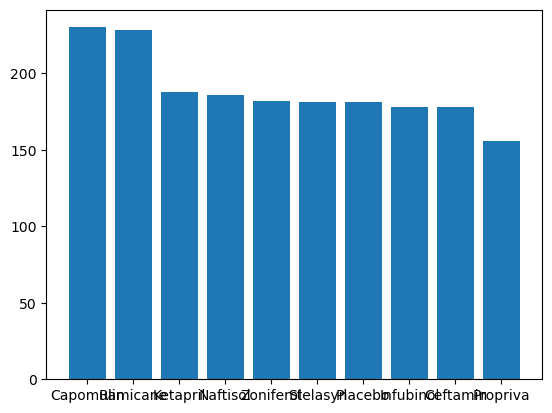

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)


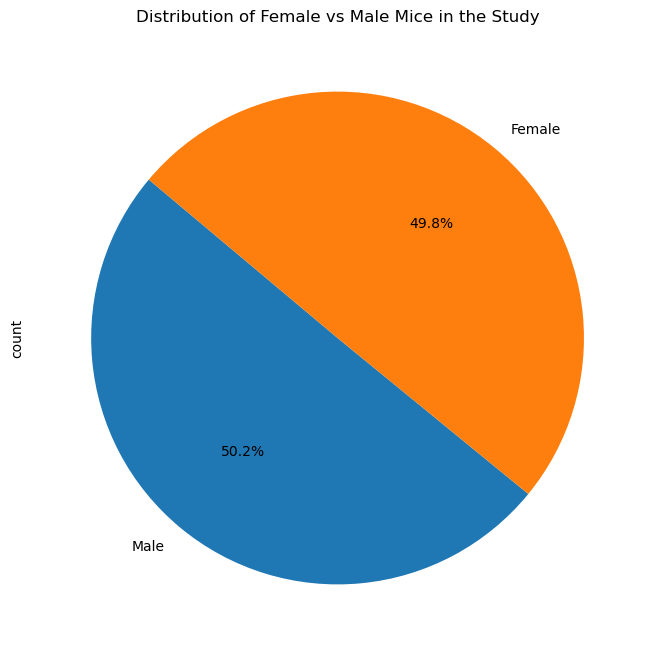

In [23]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()

# Make the pie chart
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))

# Set the title
plt.title('Distribution of Female vs Male Mice in the Study')

# Display the pie chart
plt.show()



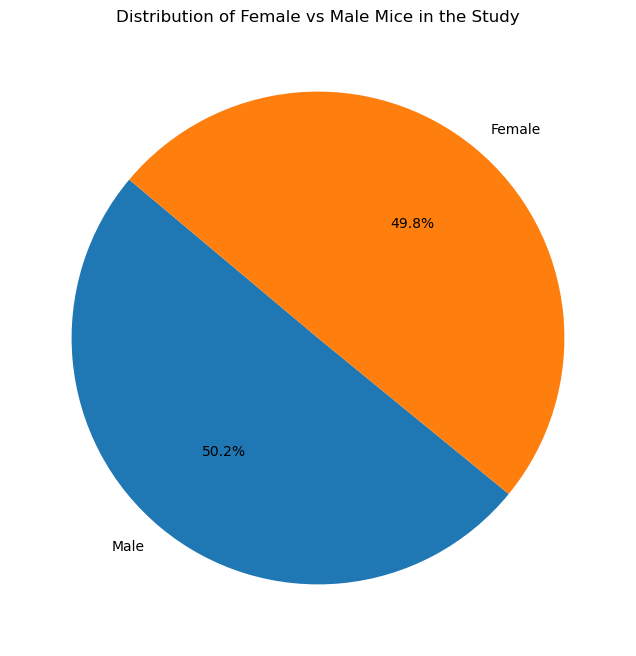

In [25]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Distribution of Female vs Male Mice in the Study')

# Display the pie chart
plt.show()



## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged DataFrame to only include the four regimens of interest
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Display the resulting DataFrame
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(treatment_vol)
    
    # Calculate the IQR (Interquartile Range)
    quartiles = treatment_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Print any potential outliers
    outliers = treatment_vol[(treatment_vol < lower_bound) | (treatment_vol > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


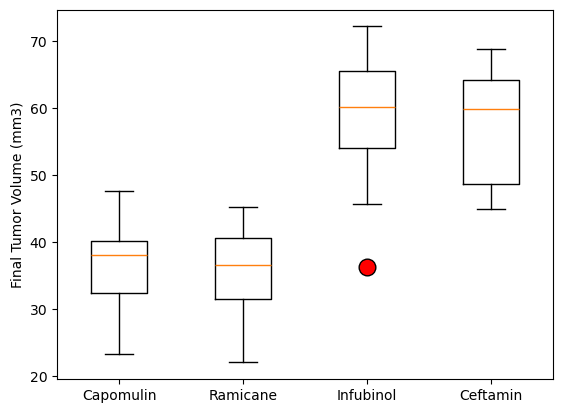

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

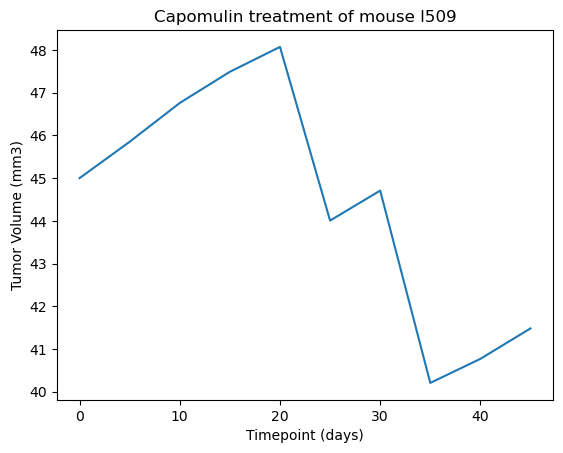

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


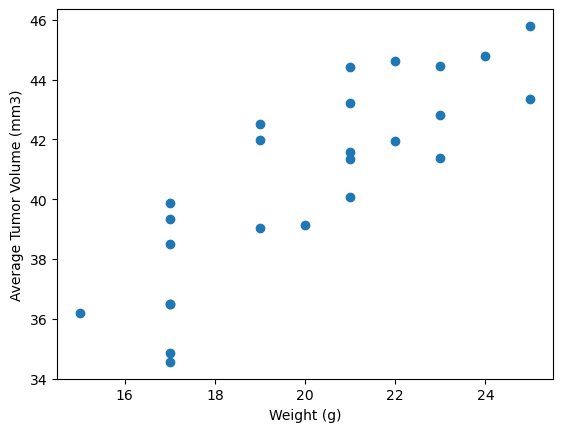

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


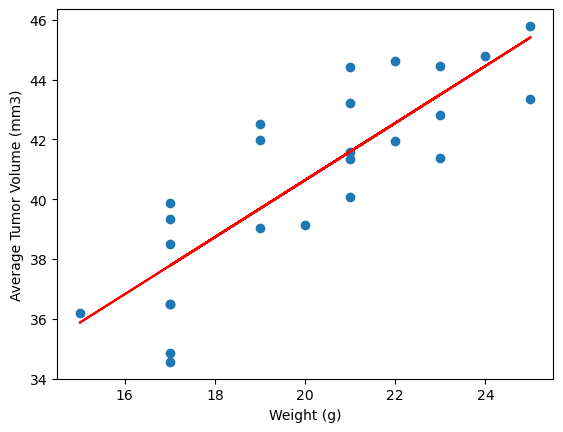

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
